#UAS DEEP LEARNING

Nama anggota : </br>
Sri Putriana (F55120058) </br>
Febrian Chrissma Bagaskara (F55120059) </br>
Bastian Arisna (F55120060) </br>
Nur Riska Salsabila (F55120061)

dataset folder : https://drive.google.com/drive/folders/1akhSQy0AVMvpyZR6MqU6Jso7DacXAwoM?usp=sharing

------------------------------------------------

#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/UAS DL

/content/drive/MyDrive/UAS DL


In [ ]:
%ls Dataset/

GenderData/  PersonData/


Load Library

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Preprocessing Data

In [30]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        validation_split=0.3,
        fill_mode="nearest")

train_generator = datagen.flow_from_directory(
        'Dataset/PersonData/',
        target_size=(224,224),
        class_mode="sparse",
        subset='training')

validation_generator = datagen.flow_from_directory(
    'Dataset/PersonData/',
    target_size=(224, 224),
    class_mode='sparse',
    subset='validation')

Found 336 images belonging to 4 classes.
Found 144 images belonging to 4 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Basthian Arisna',
 'Febrian Chrissma Bagaskara',
 'Nur Riska Salsabila',
 'Sri Putriana']

#Pembuatan Model VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    batch_size= 25,
    shuffle= True)

Epoch 1/10
15/15 [==============================] - 413s 28s/step - loss: 0.9551 - accuracy: 0.6583 - val_loss: 0.2790 - val_accuracy: 0.8875
Epoch 2/10
15/15 [==============================] - 407s 28s/step - loss: 0.1302 - accuracy: 0.9542 - val_loss: 0.0450 - val_accuracy: 0.9958
Epoch 3/10
15/15 [==============================] - 463s 32s/step - loss: 0.0394 - accuracy: 0.9979 - val_loss: 0.0448 - val_accuracy: 0.9917
Epoch 4/10
15/15 [==============================] - 466s 32s/step - loss: 0.0332 - accuracy: 0.9958 - val_loss: 0.0183 - val_accuracy: 0.9979
Epoch 5/10
15/15 [==============================] - 402s 28s/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 402s 28s/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 403s 28s/step - loss: 0.0156 - accuracy: 0.9979 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Visualisasi hasil ACC & VAL :

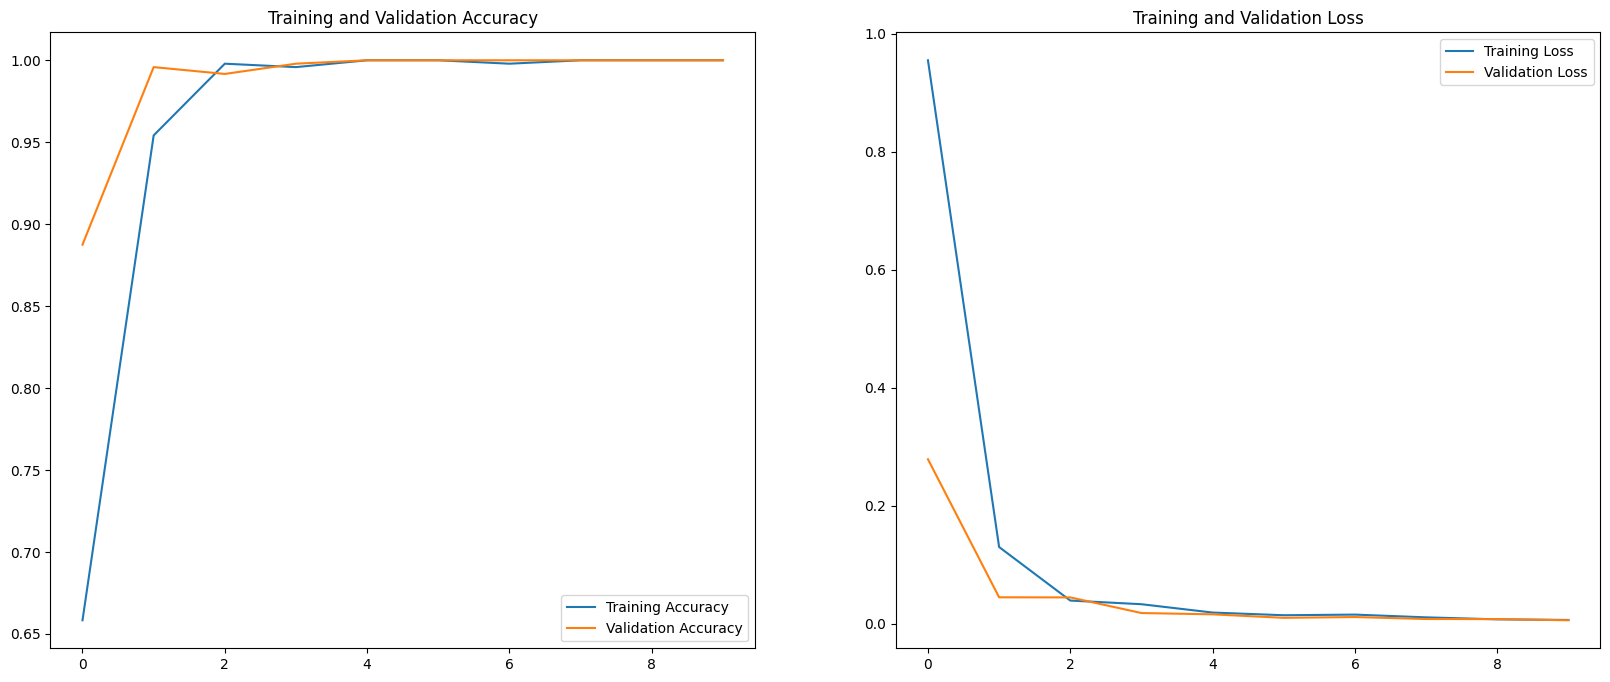

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Testing including visualization and caption

Testing Hasil preiksi terhadap sample gambar test (multiOutput)

1/1 [==============================] - 0s 371ms/step


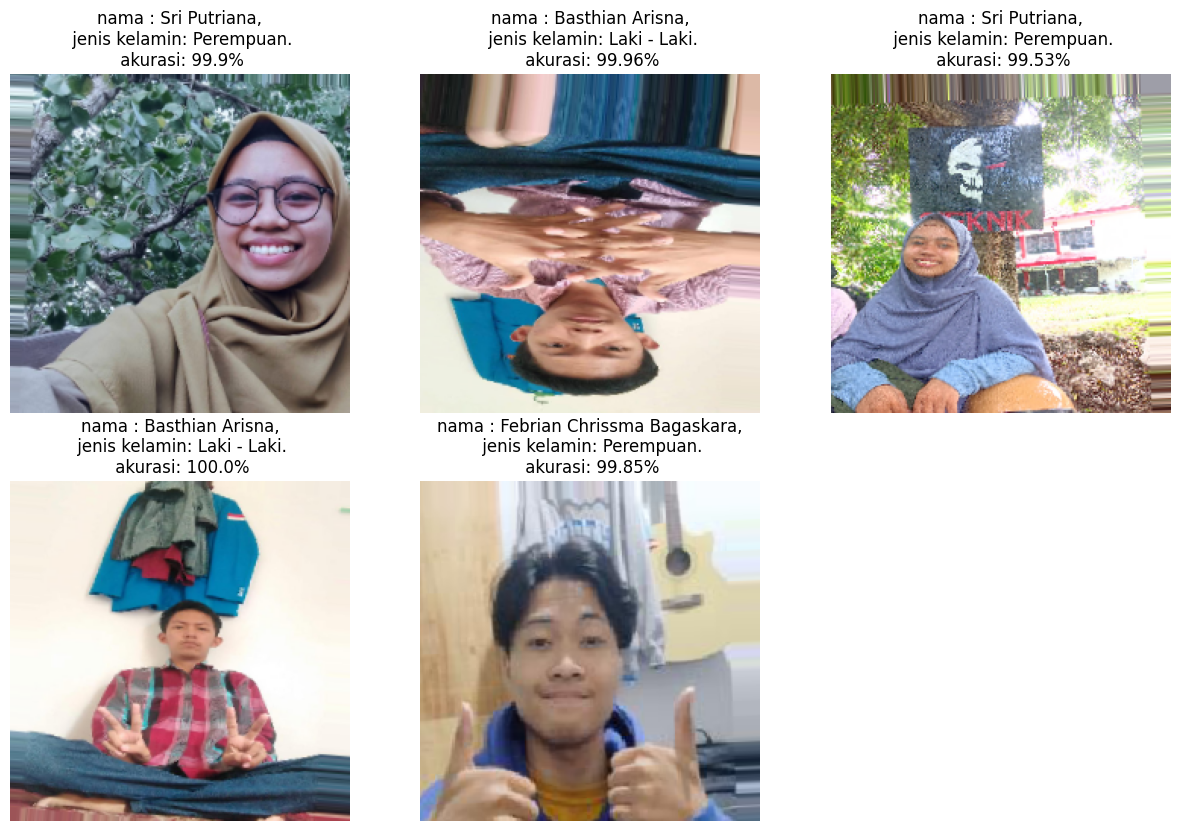

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = "Laki - Laki" if predictions[0][0] > 0.5 else "Perempuan"
    confidence = round(100 * np.max(predictions), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))

for images, labels in train_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(f"nama : {actual_class},\n jenis kelamin: {predicted_class}.\n akurasi: {confidence}%")
        plt.axis("off")
    break